In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (834, 679, 3)


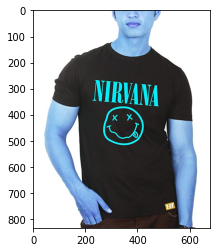

In [ ]:
image = cv2.imread('nirvana-tshirt.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

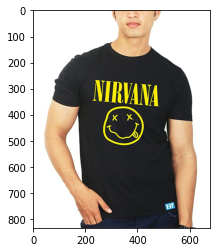

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
!sudo apt install neofetch

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  neofetch
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 74.8 kB of archives.
After this operation, 365 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 neofetch all 3.4.0-1 [74.8 kB]
Fetched 74.8 kB in 1s (110 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package neofetch.
(Reading database ... 155332 files and directories current

In [ ]:
!neofetch

            .-/+oossssoo+/-. 
        `:+ssssssssssssssssss+:` 
      -+ssssssssssssssssssyyssss+- 
    .ossssssssssssssssssdMMMNysssso. 
   /ssssssssssshdmmNNmmyNMMMMhssssss/ 
  +ssssssssshmydMMMMMMMNddddyssssssss+ 
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
ossyNMMMNyMMhsssssssssssssshmmmhssssssso 
+sssshhhyNMMNyssssssssssssyNMMMysssssss+ 
.ssssssssdMMMNhsssssssssshNMMMdssssssss. 
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/ 
  +sssssssssdmydMMMMMMMMddddyssssssss+ 
   /ssssssssssshdmNNNNmyNMMMMhssssss/ 
    .ossssssssssssssssssdMMMNysssso. 
      -+sssssssssssssssssyyyssss+- 
        `:+ssssssssssssssssss+:` 
            .-/+oossssoo+/-. 
root@1128d3f74f10 
----------------- 
OS: Ubuntu 18.04.5 LTS x86_64 
Host: Google Compute Engine 
Kernel: 5.4.144+ 
Uptime: 5 mins 
Packages: 1394 
Shell: bash 4.4.20 
Terminal: jupyter-noteboo 
CPU: Intel Xeon (2) @ 2.199GHz 
Memor

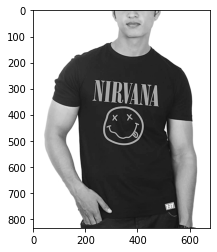

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

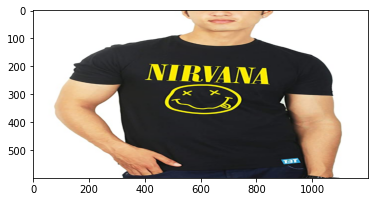

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:

modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [ ]:
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x7fcb06c88c50>,
 [Text(0.42549713125245564, 1.0143728068594557, '#fefefe'),
  Text(-1.029374743742612, 0.3877984488685224, '#b08159'),
  Text(-1.0772762989140556, -0.2224315081053811, '#f5ed15'),
  Text(0.10422152535643557, -1.0950515392676172, '#e6b78a'),
  Text(1.097162852396344, -0.07895362766534793, '#222325')])

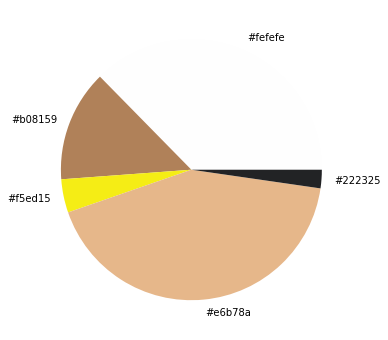

In [ ]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

return rgb_colors